In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
v = pd.read_csv('/content/placement.csv')

In [50]:
v.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [51]:
v.isnull().mean()*100
# hence no data is missing ...

,0
cgpa,0.0
placement_exam_marks,0.0
placed,0.0


/tmp/ipython-input-52-1125059576.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v['cgpa'], color='#39FF14')   # Neon Green (Laser green)
/tmp/ipython-input-52-1125059576.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v['placement_exam_marks'], color='#FF073A')  # Neon Red-Pink


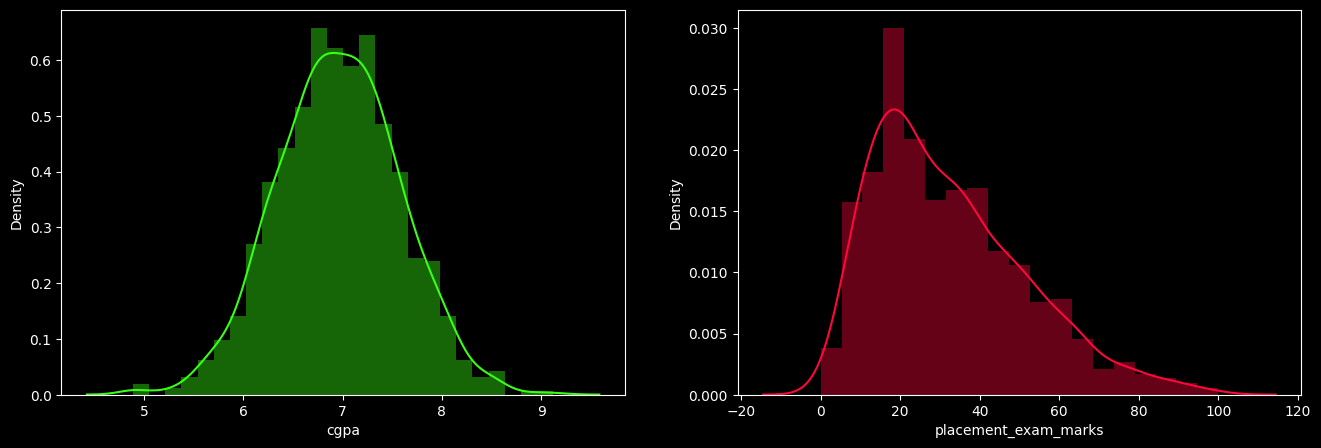

In [52]:
plt.style.use('dark_background')  # Dark background for neon pop
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(v['cgpa'], color='#39FF14')   # Neon Green (Laser green)

plt.subplot(1,2,2)
sns.distplot(v['placement_exam_marks'], color='#FF073A')  # Neon Red-Pink

plt.show()


In [53]:
v['placement_exam_marks'].skew()
# right skewed Skewness itself is unitless and generally
# ranges between -3 and +3 for real-world data.
   # important when u get the time research at -3 to 3 ...



# Positive (+) skewness →
# The distribution is skewed to the right.

# This means most students’ marks are clustered in the
# lower-to-mid range, and a few students have very high marks
# (creating a long tail on the right side of the graph).

np.float64(0.8356419499466834)

In [54]:
v['cgpa'].skew()

np.float64(-0.014529938929314918)

In [55]:
print("mean value of cgpa "  , v['cgpa'].mean())
print("std value of cgpa"    , v['cgpa'].std())
print("min value of cgpa" ,    v['cgpa'].min())
print("max value of cgpa" ,    v['cgpa'].max())
print("median value of cgpa" , v['cgpa'].median())

mean value of cgpa  6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12
median value of cgpa 6.96


In [56]:
v['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

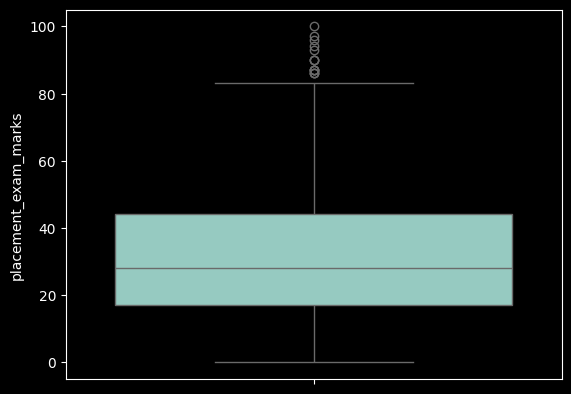

In [57]:
sns.boxplot(v['placement_exam_marks'])

In [58]:
# finding the IQR
percentile25 = v['placement_exam_marks'].quantile(0.25)
percentile75 = v['placement_exam_marks'].quantile(0.75)

In [59]:
percentile25

np.float64(17.0)

In [60]:
percentile75

np.float64(44.0)

In [61]:
iqr = percentile75 - percentile25
# It tells us how wide the middle 50% of data is.
# means 27 units data point lies here ..means
# 27 is meadian lies here.....in this range ...

# mean =  avaerage value of dataset
# median =  middle value of datset


In [62]:
iqr

np.float64(27.0)

In [63]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [64]:
print("upper limit ", upper_limit)
print("Lower_limit" ,lower_limit)

# it telling the that  after which number greater or lesser
# the datapoints wil be considered as outliers...it sets a limit


upper limit  84.5
Lower_limit -23.5


## **Finding outliers**

In [65]:
v[v['placement_exam_marks']>upper_limit]
## actually these are the outliers ...
# so marks are coming which are above than my threshold limit....

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [66]:
v[v['placement_exam_marks']<lower_limit]
# no dataframe are coming because there have no
# any value below than lower limit...

,cgpa,placement_exam_marks,placed


##**Trimming**

In [67]:
# we  are going to trim the outliers
new_v  = v[v['placement_exam_marks']<upper_limit]

In [68]:
new_v.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [69]:
new_v.shape

(985, 3)

/tmp/ipython-input-70-4177174278.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v['placement_exam_marks'], color='#39FF14')
/tmp/ipython-input-70-4177174278.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_v['placement_exam_marks'], color='#39FF14')


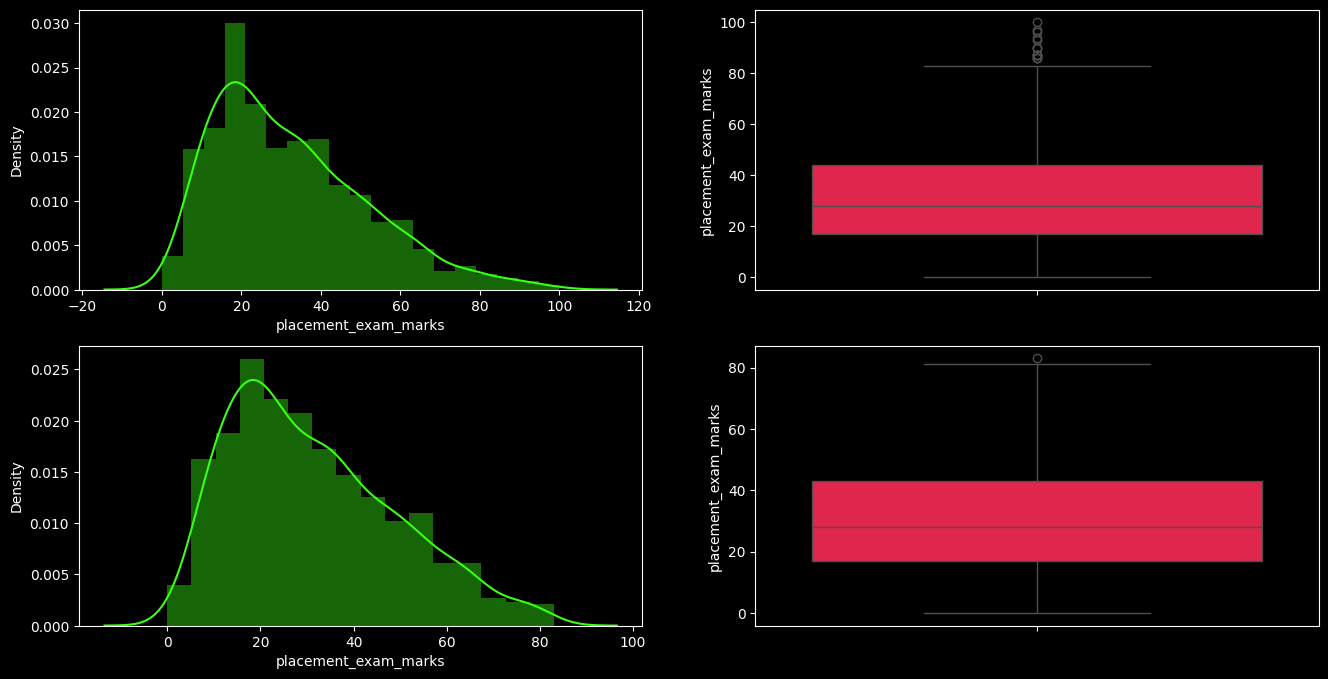

In [70]:
# comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(v['placement_exam_marks'], color='#39FF14')

plt.subplot(2,2,2)
sns.boxplot(v['placement_exam_marks'], color='#FF073A')


plt.subplot(2,2,3)
sns.distplot(new_v['placement_exam_marks'], color='#39FF14')


plt.subplot(2,2,4)
sns.boxplot(new_v['placement_exam_marks'], color='#FF073A')
plt.show()

##**Capping**

In [71]:
#              about capping

# We replace extreme outlier values
# with a fixed upper and lower limit (caps).

# Values above upper cap  is set as upper cap.
# Values below lower cap is  set as lower cap.
# Goal: Reduce the effect of outliers without removing data.

In [72]:
new_v_cap = v.copy()
new_v_cap['placement_exam_marks'] = np.where(
     new_v_cap['placement_exam_marks']>upper_limit,
     upper_limit,
     np.where(
         new_v_cap['placement_exam_marks']<lower_limit,
         lower_limit,
         new_v_cap['placement_exam_marks']
     )
 )



In [73]:
new_v_cap.shape
# shape is as same as before because we repalced outliers
# by the upper limit and lower limit ....

(1000, 3)

/tmp/ipython-input-74-3841619328.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v['placement_exam_marks'], color='#39FF14')
/tmp/ipython-input-74-3841619328.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_v['placement_exam_marks'], color='#39FF14')


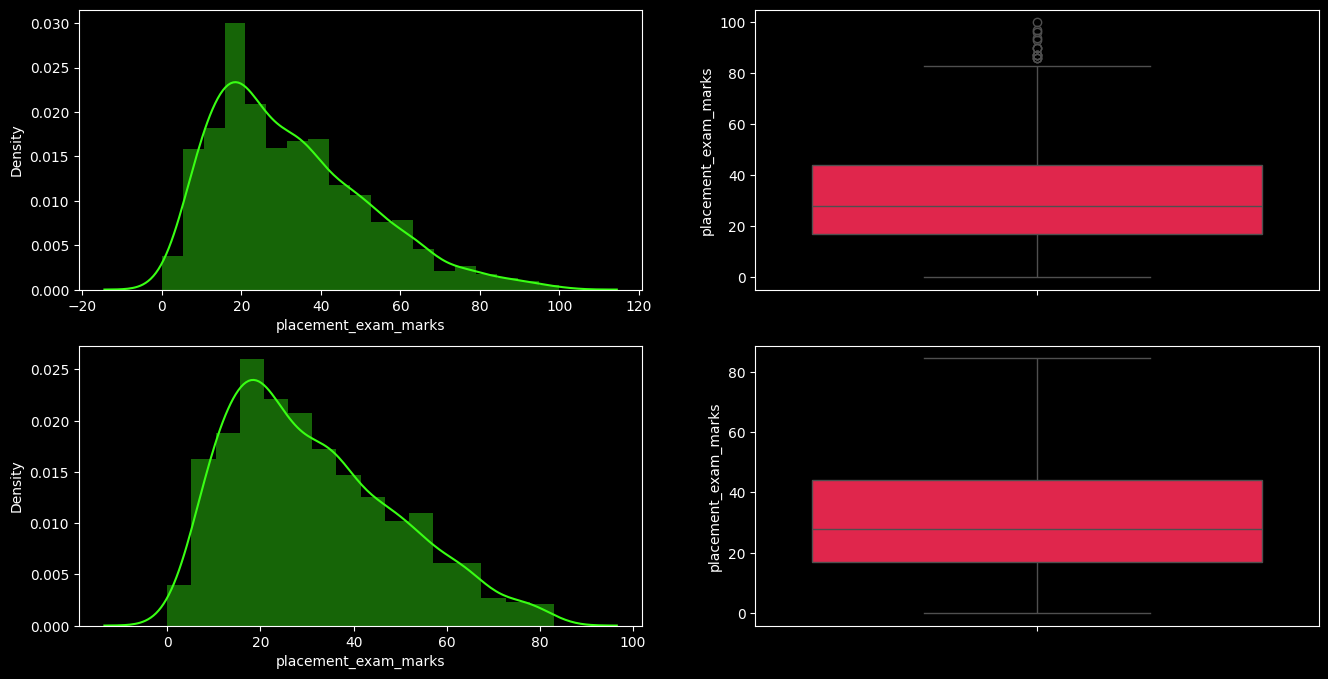

In [74]:
# comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(v['placement_exam_marks'], color='#39FF14')

plt.subplot(2,2,2)
sns.boxplot(v['placement_exam_marks'], color='#FF073A')


plt.subplot(2,2,3)
sns.distplot(new_v['placement_exam_marks'], color='#39FF14')

plt.subplot(2,2,4)
sns.boxplot(new_v_cap['placement_exam_marks'], color='#FF073A')
plt.show()